In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/medical_examination.csv')

In [3]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

In [5]:
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
overweight       int64
dtype: object

In [6]:
df['cholesterol']=np.where(df['cholesterol'] == 1, 0, 1)

In [7]:
df['gluc']=np.where(df['gluc'] == 1, 0, 1)


### Draw Categorical Plot

#### Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [8]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

In [9]:
df_cat["total"]=1
df_cat = df_cat.groupby(["cardio","variable","value"],as_index=False).count()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


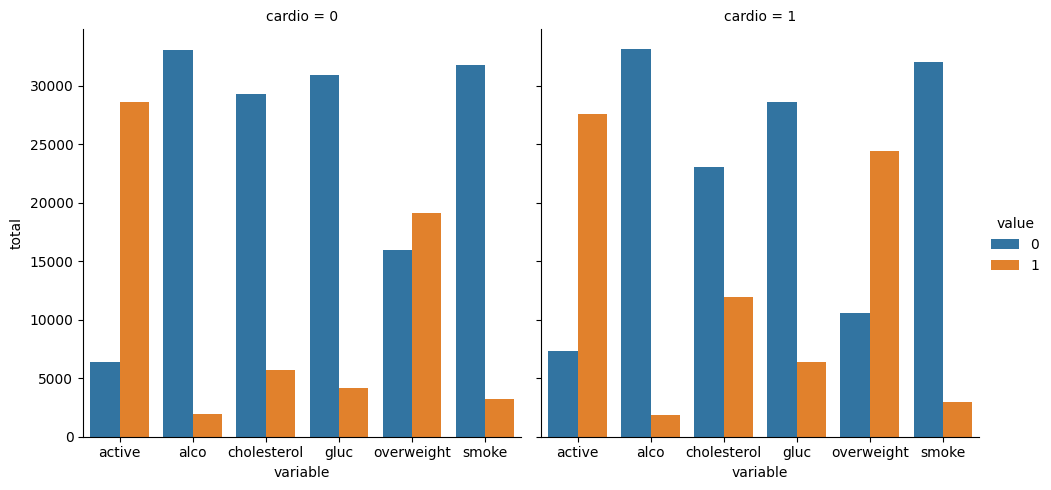

In [10]:
fig = sns.catplot(x="variable",y = "total",data=df_cat, hue="value",kind = "bar",col = "cardio").fig

In [11]:
fig.savefig('chart1.png')

### Clean the data

In [12]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [13]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

In [14]:
df.shape

(70000, 14)

In [15]:
df_heat.shape

(63259, 14)

In [16]:
#create correlation matrix of df2
corr = df_heat.corr(method='pearson')

In [17]:
#corr

In [18]:
# Generate a mask for the upper triangle
mask = np.triu(corr)

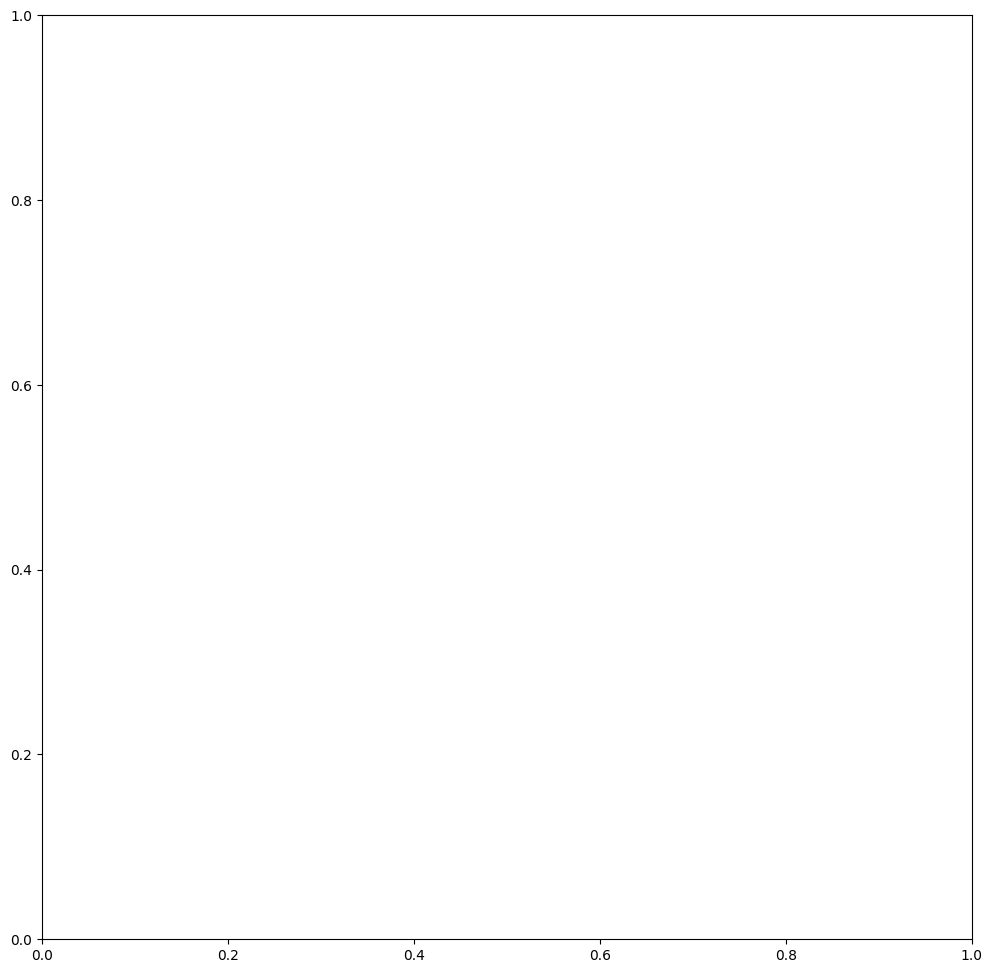

In [19]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

<Axes: >

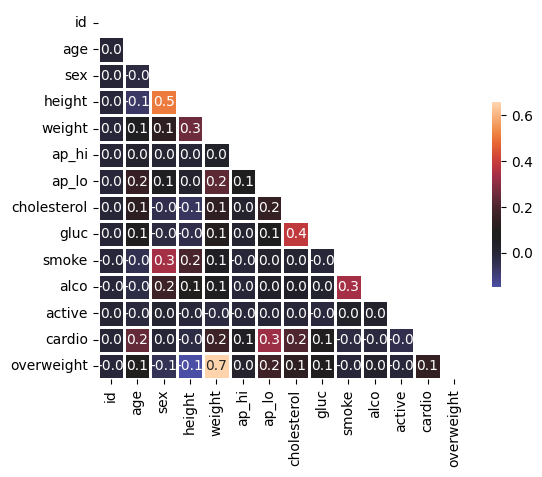

In [20]:
sns.heatmap(corr, linewidths=1,annot = True, square = True, mask = mask, fmt = "0.1f", center = 0.08, cbar_kws = {"shrink":0.5})

In [21]:
fig.savefig('heatmap.png')
#AttributeError: 'Axes' object has no attribute 'savefig'